In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import pandas as pd
from pathlib import Path
import time
import cv2

/var/folders/07/231x2gks4j5fvh_h32tcwgfm0000gn/T/ipykernel_63109/1066028959.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [21]:
def plot_traintracks(pos, target_positions, ax, crossties=False):
    # Plot position of target
    ax.plot(target_positions[0], target_positions[1], c="orange", alpha=0.3, label="target")
    ax.plot(target_positions[0][0], target_positions[1][0], c="orange", alpha=0.3, marker="o")

    # Plot ground truth for pursuer
    ax.plot(pos[0], pos[1], c="b", alpha=0.3, label="pursuer")
    ax.plot(pos[0][0], pos[1][0], c="b", alpha=0.3, marker="o")
    ax.invert_xaxis()
    print(pos.shape)
    if crossties:
        for xtie_ind in np.arange(0, len(pos[0]), 3):
            ax.plot(
                [pos[0][xtie_ind], target_positions[0][xtie_ind]],
                [pos[1][xtie_ind], target_positions[1][xtie_ind]],
                c="k", alpha=0.3)
    return ax

In [31]:
video_file = Path('/Users/yefan/Desktop/rot2/rot2-project/data/2024-03-18_SC22/3-18_SC22.avi')
df = pd.read_pickle('/Users/yefan/Desktop/rot2/rot2-project/data/2024-03-19_trajectory_analysis/03-18_SC22_trial2.pkl')
end_timestamp = 1710819720.36219    # 3-18_SC22
# end_timestamp = 1710821180.7162201    # 3-18_SC23
# end_timestamp = 1710729994.671818    # 3-17_SC22
start_time_ = 3, 35
end_time_ = 3, 45
output_dir = Path('/Users/yefan/Desktop/rot2/rot2-project/data/2024-03-19_clips_movies')

video = cv2.VideoCapture(str(video_file))
frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
frame_rate = video.get(cv2.CAP_PROP_FPS)
duration = frame_count / frame_rate
start_timestamp = end_timestamp - duration
chip_pos = np.concatenate((df['chip_est_x'].to_numpy().reshape(-1, 1), df['chip_est_y'].to_numpy().reshape(-1, 1)), axis=1).astype(int)
mouse_pos = np.concatenate((df['mouse_raw_x'].to_numpy().reshape(-1, 1), df['mouse_raw_y'].to_numpy().reshape(-1, 1)), axis=1).astype(int)
unix_timestamps = df['datetime'].apply(lambda x: time.mktime(x.timetuple()) + x.microsecond / 1e6).to_numpy() - start_timestamp
print(unix_timestamps)

# convert start and end time to unix timestamp
start_time = start_time_[0] * 60 + start_time_[1]
end_time = end_time_[0] * 60 + end_time_[1]
print(start_time, end_time)

start_index = np.searchsorted(unix_timestamps, start_time)
end_index = np.searchsorted(unix_timestamps, end_time)

print(start_index, end_index)

[178.17881823 178.23921919 178.28453422 ... 616.72801638 616.78809428
 616.83310533]
215 225
766 975


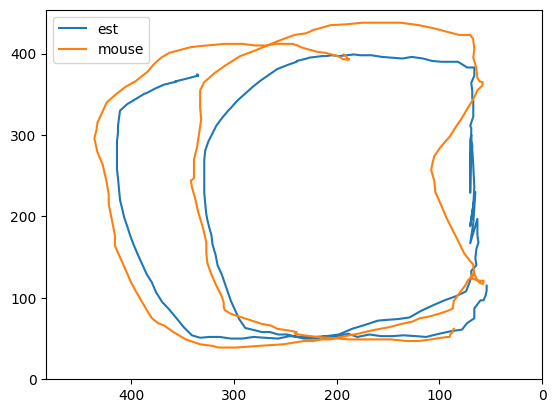

In [32]:
plt.plot(chip_pos[start_index:end_index, 0], chip_pos[start_index:end_index, 1], label='est')
plt.plot(mouse_pos[start_index:end_index, 0], mouse_pos[start_index:end_index, 1], label='mouse')
plt.xlim(0, 483)
plt.ylim(0, 454)
plt.gca().invert_xaxis()
plt.legend()

(2, 209)


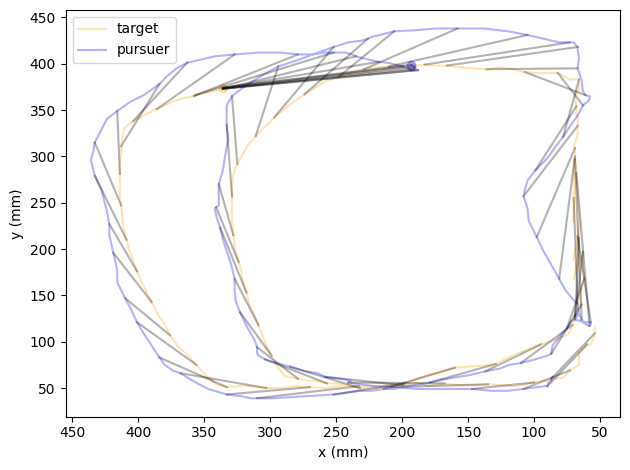

In [33]:
fig, ax = plt.subplots()
plot_traintracks(mouse_pos[start_index:end_index].T, chip_pos[start_index:end_index].T, ax, crossties=True)
ax.legend()
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
# ax.set_xlim([0, 483])
# ax.set_ylim([0, 454])
# ax.invert_xaxis()
fig.tight_layout()

In [34]:
fig.savefig(output_dir / f'{video_file.stem}_{start_time_[0]}.{start_time_[1]}-{end_time_[0]}.{end_time_[1]}.png')